# k-Nearest Neighbors (kNN) and the Iris Dataset

<img src="http://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" 
 style="height: 200px;"/ align=left>
<img src="http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png"
 style="height: 200px;"/ align=right>

### Import data

In [1]:
import pandas as pd

In [2]:
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'
column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(path_to_repo + 'data/iris/iris.csv', header=None, names=column_headers)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
len(data)

150

In [5]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
dtype: int64

### Exploring data

- We would like to classify the irises into one of these three species, based on the four given features.
- First have a look at some basic statistics and visualizations.

In [6]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = data.species.unique()

In [7]:
# Average sizes per feature per species
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


- Let's make some plots

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

# Set up color labeling
colors = pd.Series(['y', 'r', 'b'], index=species)
colors

setosa        y
versicolor    r
virginica     b
dtype: object

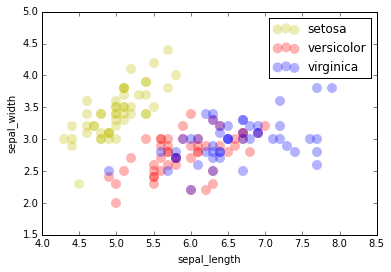

In [9]:
# Sepal: length vs width
x_feature, y_feature = 'sepal_length', 'sepal_width'
for spec in species:
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x_feature], data_spec[y_feature], c=colors[spec], label=spec,
                linewidths=0, s=100, alpha=.3)
    plt.xlabel('sepal_length'), plt.ylabel('sepal_width')
f = plt.legend()

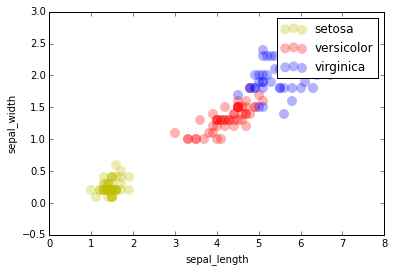

In [10]:
# Petal: length vs width
x_feature, y_feature = 'petal_length', 'petal_width'
for spec in species:
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x_feature], data_spec[y_feature], c=colors[spec], label=spec,
                linewidths=0, s=100, alpha=.3)
    plt.xlabel('sepal_length'), plt.ylabel('sepal_width')
f = plt.legend()

### Apply kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier  # Import the KNN algorithm from sk-learn.

In [12]:
model = KNeighborsClassifier(n_neighbors=5)  # init kNN, with k=5

In [13]:
X = data[features]  # put our features in a separate matrix, this is the 'input'
y = data.species  # these are the labels we would like to predict

In [14]:
model.fit(X, y)  # fit the model to the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

Let's take our first sample and see if it predicts that one correctly

In [15]:
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [16]:
y[0]

'setosa'

In [17]:
model.predict(X.head(1))

array(['setosa'], dtype=object)

Hooray! 
- What is the accuracy for the entire dataset? How many % of samples can we predict correctly?

In [18]:
model.score(X, y)

0.96666666666666667

97% – not bad.

### Cross-validation

- The above method could be seen as cheating, since we had given all answers to the model to start with. 
- To illustrate this, try $k=1$ and see what happens.

In [19]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
model.score(X, y)

1.0

- Wow, 100% accuracy! Why do you think that is?
- To avoid this problem, called _overfitting_, we often split up the dataset in a **training set** for fitting the model, and a **test set** for testing the model.

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)  # Use 80% of the data for training

In [21]:
model = KNeighborsClassifier(n_neighbors=1)  # Let's do the extreme case of k=1 first
model.fit(X_train, y_train)
print "Accuracy on training set", model.score(X_train, y_train)
print "Accuracy on training set", model.score(X_test, y_test)

Accuracy on training set 1.0
Accuracy on training set 0.966666666667


In [22]:
model = KNeighborsClassifier(n_neighbors=5)  # Let's do the extreme case of k=1 first
model.fit(X_train, y_train)
print "Accuracy on training set", model.score(X_train, y_train)
print "Accuracy on training set", model.score(X_test, y_test)

Accuracy on training set 0.966666666667
Accuracy on training set 0.966666666667


- We see that in this case k=1 and k=5 do not make a difference in performance.
- Note that we now used the _same_ split of training and test for each run. It might be more robust if we would take several splits, and look at the average performance.
- This would definitely be useful if we aren't sure the data has been sorted in some way.

In [23]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=10)  # use 10 different test sets

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [24]:
cross_val_score(model, X, y, cv=10).mean()

0.96666666666666679

- Let's compute the cross-validated accuracy for kNN for different k's

In [25]:
for k in xrange(1, 10):
    model = KNeighborsClassifier(n_neighbors=k)
    print "kNN avg cross-validated accuracy (k=%d): %5.3f" %(k, cross_val_score(model, X, y, cv=10).mean())

kNN avg cross-validated accuracy (k=1): 0.960
kNN avg cross-validated accuracy (k=2): 0.953
kNN avg cross-validated accuracy (k=3): 0.967
kNN avg cross-validated accuracy (k=4): 0.967
kNN avg cross-validated accuracy (k=5): 0.967
kNN avg cross-validated accuracy (k=6): 0.967
kNN avg cross-validated accuracy (k=7): 0.967
kNN avg cross-validated accuracy (k=8): 0.967
kNN avg cross-validated accuracy (k=9): 0.973


## Exercises

#### Applying kNN

Let's look at the 538 polling data and see if we can use the census data to predict who was ahead in the polls, using kNN.

In [26]:
# Load data
poll_data = pd.read_csv(path_to_repo + 'data/538/2012_poll_data_states.csv', sep='\t')
census_data = pd.read_csv(path_to_repo + 'data/538/census_demographics.csv')
states = pd.read_csv(path_to_repo + 'data/538/states.csv')

In [27]:
# Join all the tables
census_w_polls = \
    census_data.merge(states, left_on='state', right_on='State_name') \
    .merge(poll_data, left_on='State_code', right_on='State')

In [28]:
print len(census_w_polls)
census_w_polls.head(1)

767


,state,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,...,State_name,State_code,Date,MoE,Obama (D),Poll,Romney (R),Sample,Spread,State
0,ARIZONA,4.5,30.1,57.4,85,26.3,25680,50448,56.3,3934880.535,...,ARIZONA,AZ,9/15 - 9/26,--,43,RCP Average,48.7,--,Romney +5.7,AZ


In [29]:
# Select some features
features = ['per_black', 'per_hisp', 'per_white', 'educ_hs', 'educ_coll', 'pop_density', 'per_older', 'per_vote']
X = census_w_polls[features]
y = (census_w_polls['Obama (D)'] > census_w_polls['Romney (R)']).astype(int)

- Initialize kNN, fit the model on all data, and compute the accuracy of your model.

In [30]:
# your code here

- Now use a training and test set for fit and test your model.
- How is its performance different?

In [31]:
# your code here

- Try a few different values for $k$ to see how your model changes

- Try removing features, or adding some other features and see how your model changes 

#### (*) Parameter optimization

Finding the best $k$ for your kNN-model is called _parameter optimization.

- (*) Take the iris dataset again, and plot the _in-sample_ accuracy of your model for all relevant $k$ (i.e., not using a training and test set, just using all data).

- (*) Take the iris dataset again, and plot the cross-validated accuracy of your model for all relevant $k$.

You can imagine that using the test set to find your best $k$ poses the same _overfitting_ problem as we saw before: maybe we chose the $k$ only because it worked well for a specific test set. 
Best is therefore, to split up the dataset in a training set, an optimization set, and a test set, in say a 60-20-20 ratio.
- (**) Train your model on your training set, find the best $k$ using the optimization set, and use the test set to measure how good your model is.


#### (**) Implementing kNN yourself

Goal of this exercise is to write the entire kNN algorithm yourself in python. This is a great exercise for those students who'd like to master the math *and* coding behind the algorithm.
- Please see the file `knn.py` in the course repo.
- Review the code. There are three methods that you need to complete: `fit`, `predict` and `score`.
- When you're done, you can check your work by running `$python knn_test.py` on the command line. 
- You can also run the code in this notebook below.
- Solutions are already given in `knn_solutions.py`

In [32]:
path_to_code = path_to_repo + '5_intro_to_ml/'

In [35]:
import sys, os
sys.path.append(path_to_code)
import knn_solutions as knn 
import knn
reload(knn)

model = knn.kNN(k=15)
model.fit(X, y)
model.score(X, y)